1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
X = np.array(df.iloc[:,:-1])
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y = np.array(df.iloc[:,-1])
y 

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [9]:
knn_3.fit(X_train, y_train)
print("Para k=3, test:", knn_3.score(X_test, y_test))
predicted_1_3 = knn_3.predict([[15.7,2.8,9.5,0.1]])
print("Para la primera muestra con k=3:", predicted_1_3)
predicted_2_3 = knn_3.predict([[1.7,3.8,4.5,11.3]])
print("Para la segunda muestra con k=3:", predicted_2_3)

Para k=3, test: 0.9666666666666667
Para la primera muestra con k=3: ['Virginica']
Para la segunda muestra con k=3: ['Virginica']


In [10]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

In [11]:
knn_7.fit(X_train, y_train)
print("Para k=7, test:", knn_7.score(X_test, y_test))
predicted_1_7 = knn_7.predict([[15.7,2.8,9.5,0.1]])
print("Para la primera muestra con k=7:", predicted_1_7)
predicted_2_7 = knn_7.predict([[1.7,3.8,4.5,11.3]])
print("Para la segunda muestra con k=7:", predicted_2_7)

Para k=7, test: 1.0
Para la primera muestra con k=7: ['Virginica']
Para la segunda muestra con k=7: ['Virginica']


### ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
#### El resultado para entrenamiento mejor con mayor k.


### Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.


([<matplotlib.axis.XTick at 0x1b167ad4b08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

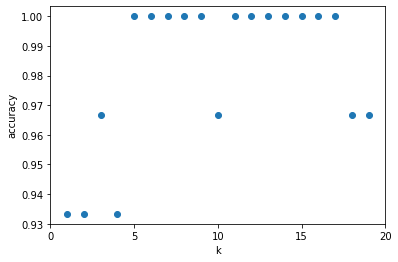

In [12]:
#Para test=20%, cuando k es igual a un número entre 5 y 18, que no sea 10, el score es perfecto.
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

### Conjunto de test de 60% de datos

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [19]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [20]:
knn_3.fit(X_train, y_train)
print("Para k=3, test:", knn_3.score(X_test, y_test))
predicted_1_3 = knn_3.predict([[15.7,2.8,9.5,0.1]])
print("Para la primera muestra con k=3:", predicted_1_3)
predicted_2_3 = knn_3.predict([[1.7,3.8,4.5,11.3]])
print("Para la segunda muestra con k=3:", predicted_2_3)

Para k=3, test: 0.9555555555555556
Para la primera muestra con k=3: ['Virginica']
Para la segunda muestra con k=3: ['Virginica']


In [21]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

In [22]:
knn_7.fit(X_train, y_train)
print("Para k=7, test:", knn_7.score(X_test, y_test))
predicted_1_7 = knn_7.predict([[15.7,2.8,9.5,0.1]])
print("Para la primera muestra con k=7:", predicted_1_7)
predicted_2_7 = knn_7.predict([[1.7,3.8,4.5,11.3]])
print("Para la segunda muestra con k=7:", predicted_2_7)

Para k=7, test: 0.9666666666666667
Para la primera muestra con k=7: ['Virginica']
Para la segunda muestra con k=7: ['Virginica']


In [69]:
#Cuando cambiamos aumentamos test, el score deja de ser perfecto en k=7. Esto se debe a que se tomán más valores de precedente para definir test y hay un mayor margen a que se incorporen valores que aumenten la confusión, y, en consecuencia, la probabilidad de acierto o score.

### Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
### ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [25]:
df2 = df[df["variety"] != "Setosa"].reset_index(drop=True)
df2

,sepal.length,sepal.width,petal.length,petal.width,variety
0,7.0,3.2,4.7,1.4,Versicolor
1,6.4,3.2,4.5,1.5,Versicolor
2,6.9,3.1,4.9,1.5,Versicolor
3,5.5,2.3,4.0,1.3,Versicolor
4,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,Virginica
96,6.3,2.5,5.0,1.9,Virginica
97,6.5,3.0,5.2,2.0,Virginica
98,6.2,3.4,5.4,2.3,Virginica


In [28]:
X = np.array(df2.iloc[:,:-1])
X

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

In [29]:
y = np.array(df2.iloc[:,-1])
y 

array(['Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virgi

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [31]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [32]:
knn_3.fit(X_train, y_train)
print("Para k=3, test:", knn_3.score(X_test, y_test))
predicted_1_3 = knn_3.predict([[15.7,2.8,9.5,0.1]])
print("Para la primera muestra con k=3:", predicted_1_3)
predicted_2_3 = knn_3.predict([[1.7,3.8,4.5,11.3]])
print("Para la segunda muestra con k=3:", predicted_2_3)

Para k=3, test: 0.9333333333333333
Para la primera muestra con k=3: ['Virginica']
Para la segunda muestra con k=3: ['Virginica']


In [33]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

In [34]:
knn_7.fit(X_train, y_train)
print("Para k=7, test:", knn_7.score(X_test, y_test))
predicted_1_7 = knn_7.predict([[15.7,2.8,9.5,0.1]])
print("Para la primera muestra con k=7:", predicted_1_7)
predicted_2_7 = knn_7.predict([[1.7,3.8,4.5,11.3]])
print("Para la segunda muestra con k=7:", predicted_2_7)

Para k=7, test: 0.9166666666666666
Para la primera muestra con k=7: ['Virginica']
Para la segunda muestra con k=7: ['Virginica']


#### La probabilidad de acierto disminuye porque hay menos concreción en las respuestas (desaparece del target la posibilidad Setosa). Al haber menos respuestas posibles en el target, el margen para errar es superior.

#### Para estos datos, Knn es un buen algoritmo a utilizar porque tiene una capacidad de acierto muy elevada.